In [ ]:
%cd /content/drive/MyDrive/Classes/OMS_data_analysis/Project karmma/data/CLANS/Iteration 2

/content/drive/MyDrive/Classes/OMS_data_analysis/Project karmma/data/CLANS/Iteration 2


# Decision Trees to predict winner of Clash Of Clans


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('results_ml.csv')
# data = pd.read_csv('clash_of_clans_with_player_cards_kk.csv', error_bad_lines=False)
# data = pd.read_csv('clash_of_clans_player_cards_kk.csv', quoting=3, quotechar='"', on_bad_lines='skip')




In [ ]:
data.head()

,player_startingTrophies,player_kingTowerHitPoints,Winner,player_cardone_level,player_cardtwo_level,player_cardthree_level,player_cardfour_level,player_cardfive_level,player_cardsix_level,player_cardseven_level,...,opponent_threeCrownWins_y,opponent_challengeCardsWon,opponent_challengeMaxWins,opponent_tournamentCardsWon,opponent_tournamentBattleCount,opponent_warDayWins,opponent_clanCardsCollected,opponent_starPoints,opponent_expPoints,opponent_totalExpPoints_y
0,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
1,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
2,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
3,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
4,5926,6408,1,9,6,14,12,12,14,9,...,2287.0,268.0,12.0,25.0,79.0,81.0,96645.0,56295.0,7594.0,186364.0


In [ ]:
data.head()

,player_startingTrophies,player_kingTowerHitPoints,Winner,player_cardone_level,player_cardtwo_level,player_cardthree_level,player_cardfour_level,player_cardfive_level,player_cardsix_level,player_cardseven_level,...,opponent_threeCrownWins_y,opponent_challengeCardsWon,opponent_challengeMaxWins,opponent_tournamentCardsWon,opponent_tournamentBattleCount,opponent_warDayWins,opponent_clanCardsCollected,opponent_starPoints,opponent_expPoints,opponent_totalExpPoints_y
0,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
1,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
2,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
3,5955,6408,1,9,6,14,12,12,14,9,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
4,5926,6408,1,9,6,14,12,12,14,9,...,2287.0,268.0,12.0,25.0,79.0,81.0,96645.0,56295.0,7594.0,186364.0


In [ ]:
# # convert string arrays to actual arrays
# import json
# import pandas as pd

# def parse_json_string(json_string):
#     try:
#         return json.loads(json_string.replace("'", "\""))  # Replace single quotes with double quotes for JSON parsing
#     except json.JSONDecodeError:
#         return None  # or some other value to indicate failure

# # Apply the parsing function to the player_cards and opponent_cards columns
# data['player_cards'] = data['player_cards'].apply(parse_json_string)
# data['opponent_cards'] = data['opponent_cards'].apply(parse_json_string)

# # Now check the first few rows to see if the parsing worked
# print(data[['player_cards', 'opponent_cards']].head())



In [ ]:
# print(data.columns.tolist())
# data.head()

In [ ]:
# # one hot encode card arrays as categorical variables
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()

# # One-hot encoding for player_cards
# player_cards_encoded = mlb.fit_transform(data['player_cards'])
# player_cards_df = pd.DataFrame(player_cards_encoded, columns=mlb.classes_)

# # One-hot encoding for opponent_cards
# opponent_cards_encoded = mlb.fit_transform(data['opponent_cards'])
# opponent_cards_df = pd.DataFrame(opponent_cards_encoded, columns=mlb.classes_)

# # Concatenate the one-hot encoded card data to the original dataframe
# data = pd.concat([data, player_cards_df.add_prefix('player_'), opponent_cards_df.add_prefix('opponent_')], axis=1)

# # Drop the original player_cards and opponent_cards columns
# data = data.drop(columns=['player_cards', 'opponent_cards'])


In [ ]:
# print(data.columns.tolist())
# data.head()

In [ ]:
# make sure all columns contain numeric values only
import pandas as pd

string_columns = data.select_dtypes(include=['object']).columns

# Display string columns
print(f'Columns with string values: {string_columns}')

# Convert string columns to numerical values where possible
for col in string_columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except Exception as e:
        print(f'Could not convert column {col} to numeric: {e}')


Columns with string values: Index([], dtype='object')


In [ ]:
# double check all columns are numeric
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Loop through each column in the dataframe
for col in data.columns:
    # Check if the column is of object type
    if data[col].dtype == 'object':
        # Use label encoder to do the numeric transformation
        data[col] = le.fit_transform(data[col])

In [ ]:
# data.head()

list(data.columns.values.tolist())

['player_startingTrophies',
 'player_kingTowerHitPoints',
 'Winner',
 'player_cardone_level',
 'player_cardtwo_level',
 'player_cardthree_level',
 'player_cardfour_level',
 'player_cardfive_level',
 'player_cardsix_level',
 'player_cardseven_level',
 'player_cardeight_level',
 'opponent_startingTrophies',
 'opponent_kingTowerHitPoints',
 'opponent_cardone_level',
 'opponent_cardtwo_level',
 'opponent_cardthree_level',
 'opponent_cardfour_level',
 'opponent_cardfive_level',
 'opponent_cardsix_level',
 'opponent_cardseven_level',
 'opponent_cardeight_level',
 'player_expLevel_x',
 'player_battleCount_x',
 'player_threeCrownWins_x',
 'player_totalExpPoints_x',
 'opponent_expLevel_x',
 'opponent_battleCount_x',
 'opponent_threeCrownWins_x',
 'opponent_totalExpPoints_x',
 'Witch',
 'Balloon',
 'Skeletons',
 'Firecracker',
 'The Log',
 'Dart Goblin',
 'Princess',
 'P.E.K.K.A',
 'Zap',
 'Inferno Dragon',
 'Knight',
 'Prince',
 'Wall Breakers',
 'Hog Rider',
 'Archers',
 'Skeleton Army',
 'Val

Accuracy: 0.97


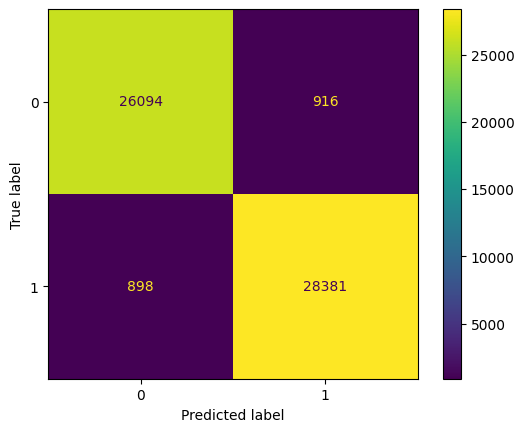

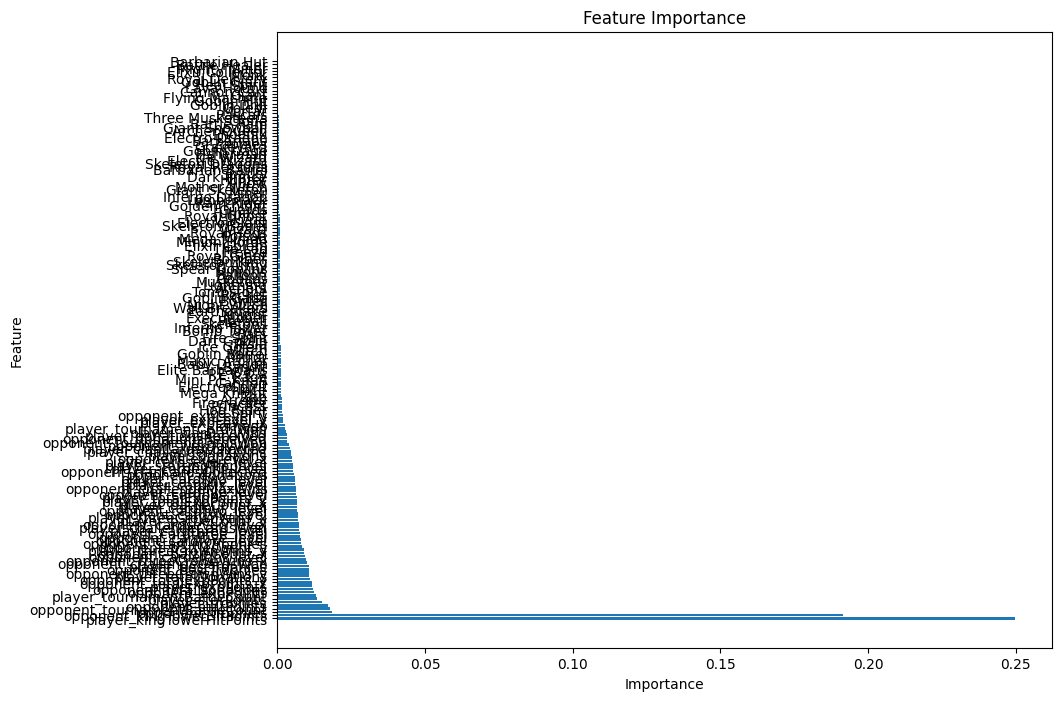

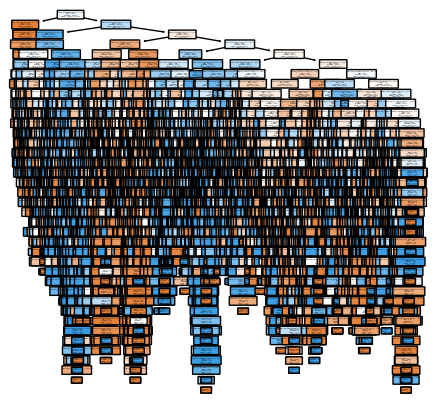

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Split the data into training and testing sets
X = data.drop(['Winner'], axis=1)
y = data['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
# Since you commented out the plot_confusion_matrix, I assume you're aware it's deprecated.
# You should use ConfusionMatrixDisplay.from_estimator instead, which I'll include here for completeness.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# Feature Importances
feature_importances = clf.feature_importances_

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Visualize the Decision Tree (this might be very large if the tree is deep)
plt.figure(figsize=(5, 5))
plot_tree(clf, feature_names=X.columns, class_names=['Lose', 'Win'], filled=True, rounded=True)
plt.show()


In [ ]:
X

,player_startingTrophies,player_kingTowerHitPoints,player_cardone_level,player_cardtwo_level,player_cardthree_level,player_cardfour_level,player_cardfive_level,player_cardsix_level,player_cardseven_level,player_cardeight_level,...,opponent_threeCrownWins_y,opponent_challengeCardsWon,opponent_challengeMaxWins,opponent_tournamentCardsWon,opponent_tournamentBattleCount,opponent_warDayWins,opponent_clanCardsCollected,opponent_starPoints,opponent_expPoints,opponent_totalExpPoints_y
0,5955,6408,9,6,14,12,12,14,9,14,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
1,5955,6408,9,6,14,12,12,14,9,14,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
2,5955,6408,9,6,14,12,12,14,9,14,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
3,5955,6408,9,6,14,12,12,14,9,14,...,627.0,8.0,3.0,0.0,45.0,0.0,0.0,2223.0,2608.0,141378.0
4,5926,6408,9,6,14,12,12,14,9,14,...,2287.0,268.0,12.0,25.0,79.0,81.0,96645.0,56295.0,7594.0,186364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281440,6199,4724,6,4,12,13,8,11,5,9,...,769.0,0.0,6.0,0.0,167.0,0.0,0.0,28888.0,10954.0,134724.0
281441,6228,5945,6,4,12,13,8,11,5,9,...,2666.0,618.0,11.0,0.0,18.0,6.0,9440.0,56425.0,8885.0,287655.0
281442,6228,5945,6,4,12,13,8,11,5,9,...,2666.0,618.0,11.0,0.0,18.0,6.0,9440.0,56425.0,8885.0,287655.0
281443,6228,5945,6,4,12,13,8,11,5,9,...,2666.0,618.0,11.0,0.0,18.0,6.0,9440.0,56425.0,8885.0,287655.0


Accuracy: 0.74


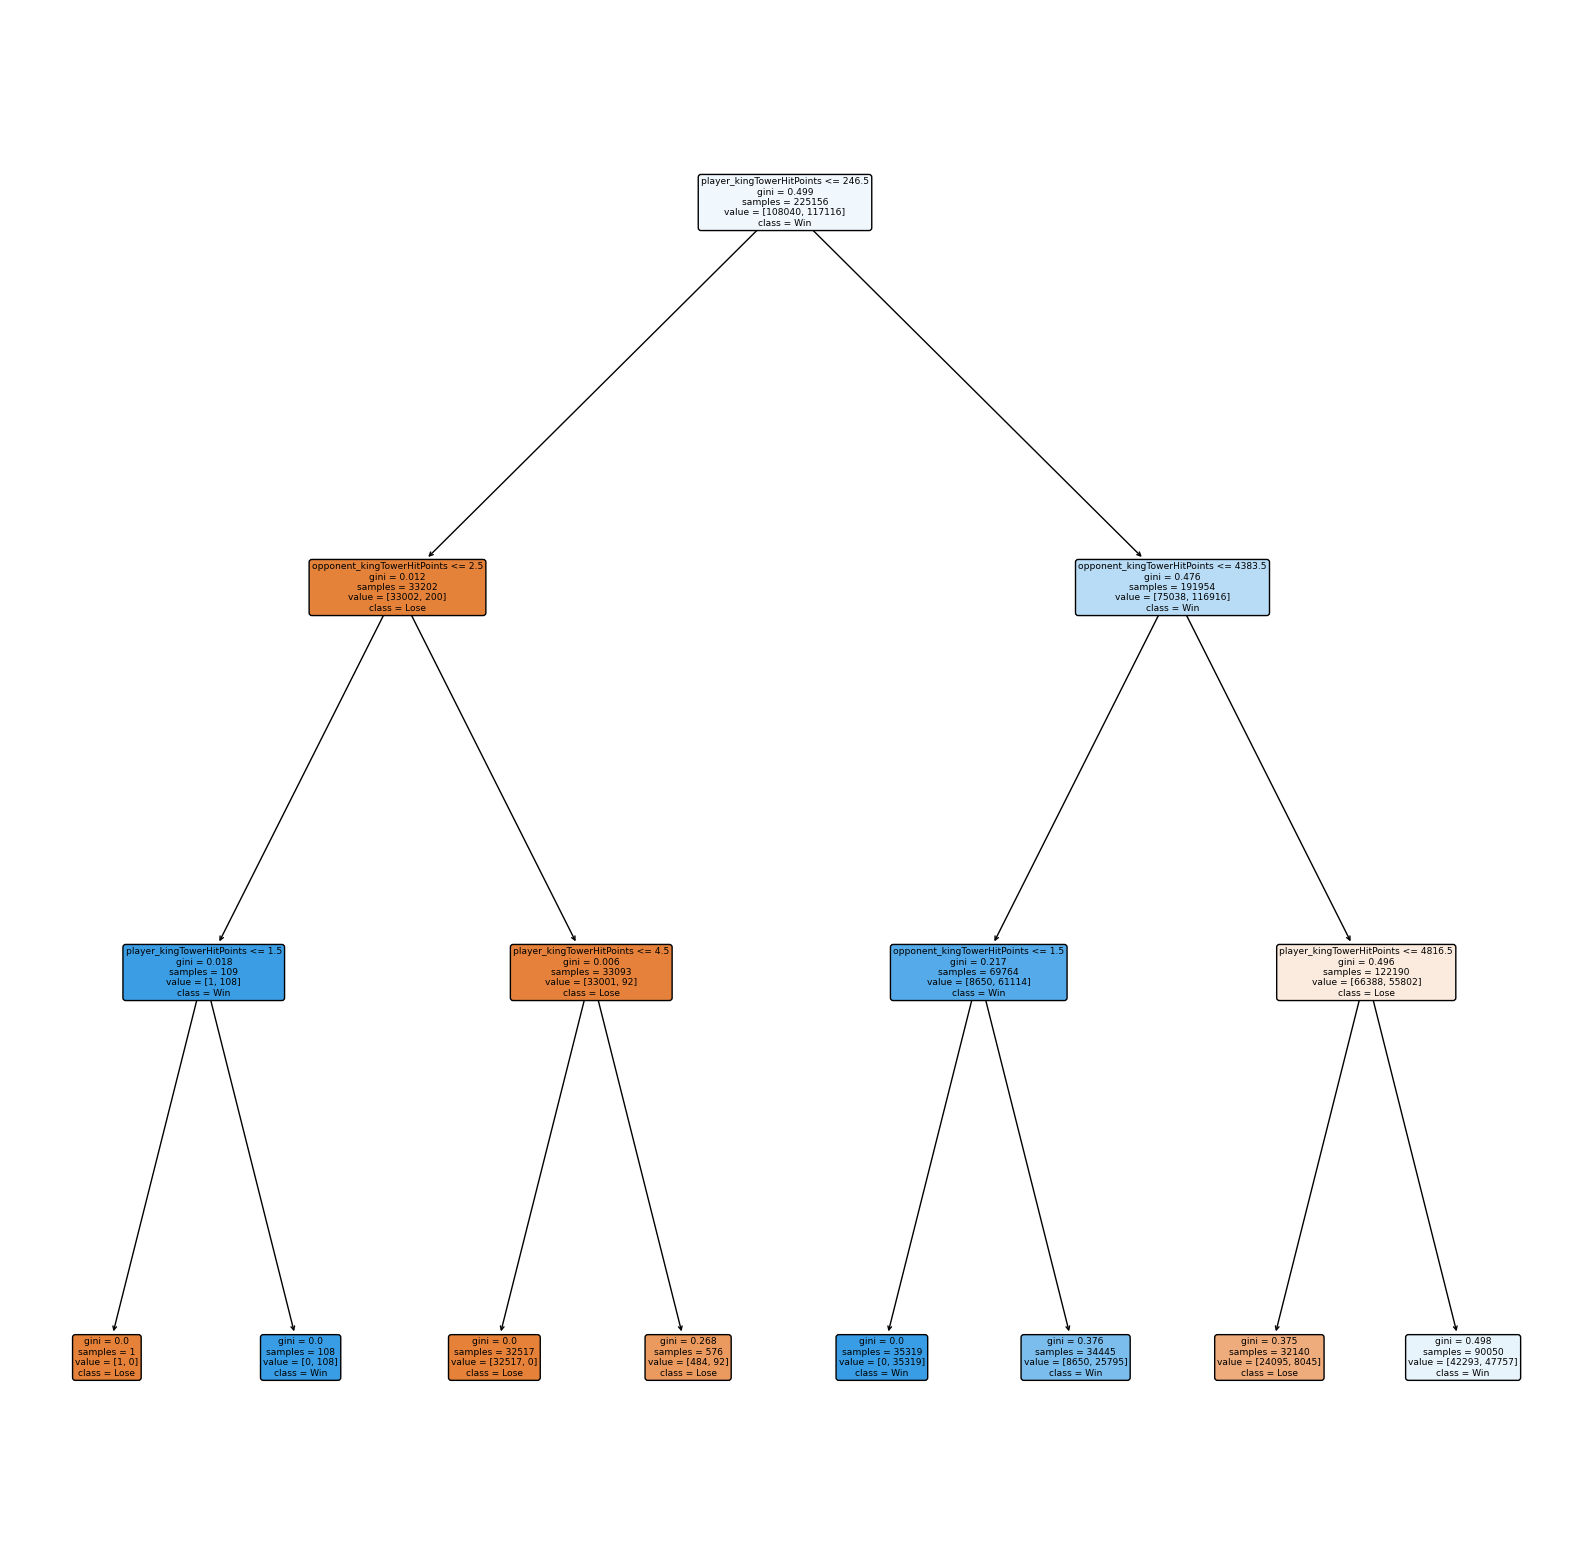

In [ ]:
# rebuild tree make using important features

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Set a threshold for feature importance, for example, 0.01
threshold = 0.01

# Filter out the features below the threshold
important_features_df = features_df[features_df['Importance'] >= threshold]

# Extract the names of the most important features from important_features_df
important_features = important_features_df['Feature'].values

X_important = X[important_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42, stratify=y)

# Create a new decision tree classifier
clf_important = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
clf_important.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf_important.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the Decision Tree (with a depth limit to keep it readable)
plt.figure(figsize=(20, 20))
plot_tree(clf_important, feature_names=important_features, class_names=['Lose', 'Win'], filled=True, rounded=True)
plt.show()


Accuracy: 0.97


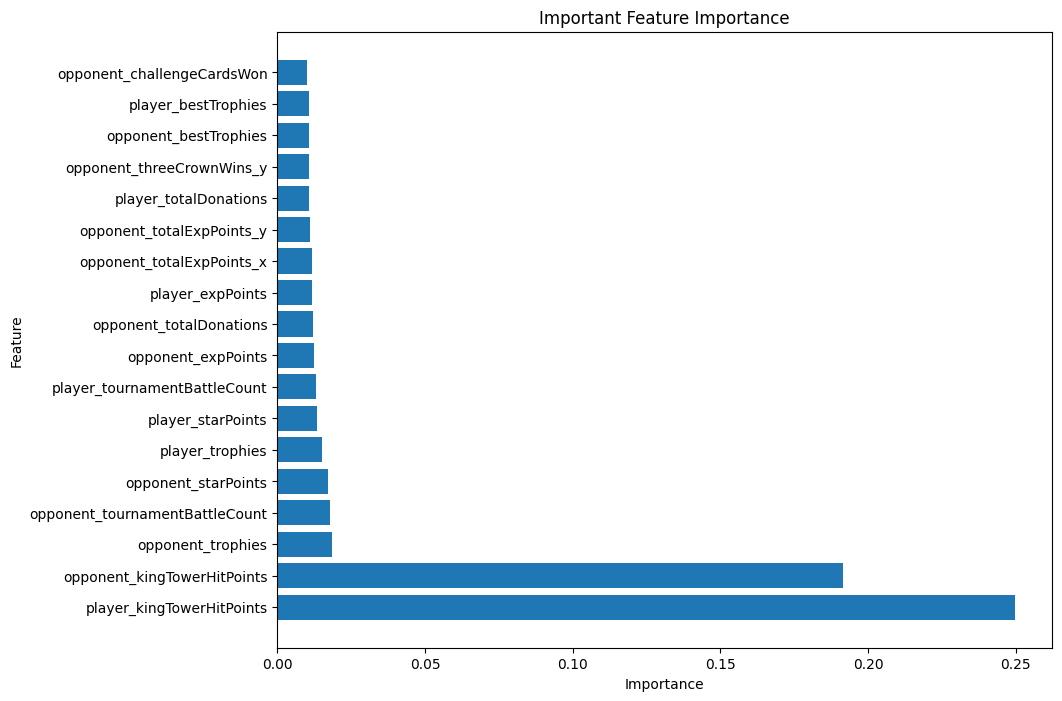

,Feature,Importance
0,player_kingTowerHitPoints,0.249841
1,opponent_kingTowerHitPoints,0.191657
2,opponent_trophies,0.018531
3,opponent_tournamentBattleCount,0.017877
4,opponent_starPoints,0.017059
5,player_trophies,0.015161
6,player_starPoints,0.013462
7,player_tournamentBattleCount,0.013044
8,opponent_expPoints,0.012407
9,opponent_totalDonations,0.012191


In [ ]:
# re plot it with most key features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Set a threshold for feature importance, for example, 0.01
threshold = 0.01

# Filter out the features below the threshold
important_features_df = features_df[features_df['Importance'] >= threshold]

# Plot the important feature importances
plt.figure(figsize=(10, 8))
plt.barh(important_features_df['Feature'], important_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Important Feature Importance')
plt.show()

# Sort the important features DataFrame by importance
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

# Reset the index for better display
important_features_df.reset_index(drop=True, inplace=True)

# Display the important features DataFrame
with pd.option_context('display.colheader_justify', 'center'):
    display(important_features_df)


Accuracy: 0.78


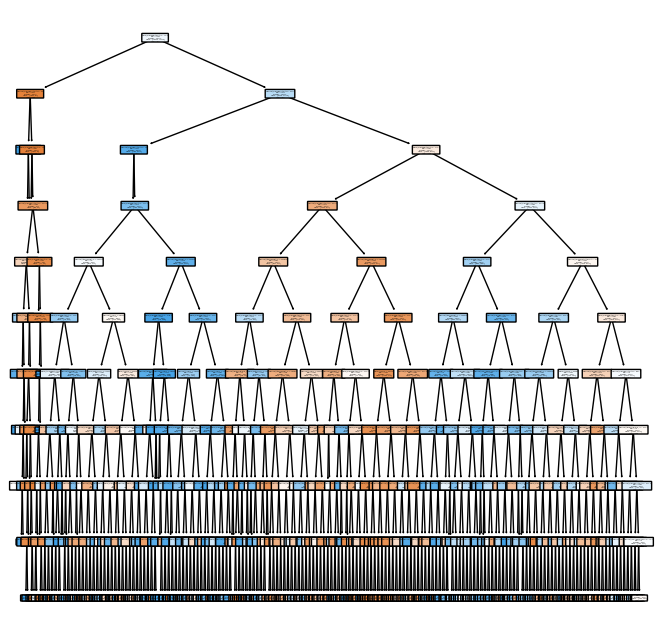

In [ ]:
# tree wth more depth
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Set a threshold for feature importance, 0.01
threshold = 0.01

# Filter out the features below the threshold
important_features_df = features_df[features_df['Importance'] >= threshold]

# Extract the names of the most important features from important_features_df
important_features = important_features_df['Feature'].values

# Filter data to include only the most important features
X_important = X[important_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42, stratify=y)

# Create a new decision tree classifier with a deeper max_depth, 10
clf_important = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model on the training data
clf_important.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf_important.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the Decision Tree
plt.figure(figsize=(8, 8))
plot_tree(clf_important, feature_names=important_features, class_names=['Lose', 'Win'], filled=True, rounded=True)
plt.show()


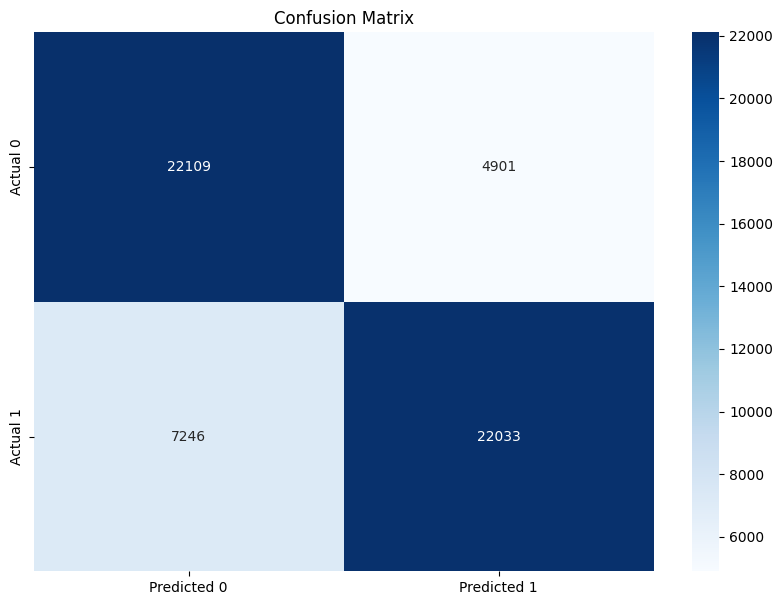

In [ ]:
;# confusion matrix
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Iteration 2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

columns_to_drop = ["player_kingTowerHitPoints", "opponent_kingTowerHitPoints"]
data = data.drop(columns=columns_to_drop)


# Shuffle the dataset with a random seed
random_seed = 42
data = data.sample(frac=1, random_state=random_seed)

# Split the data into training and testing sets
X = data.drop(['Winner'], axis=1)
y = data['Winner']

# Use the last 20,000 rows for testing and the rest for training
X_train = X.iloc[:-20000]
y_train = y.iloc[:-20000]
X_test = X.iloc[-20000:]
y_test = y.iloc[-20000:]

Accuracy: 0.95


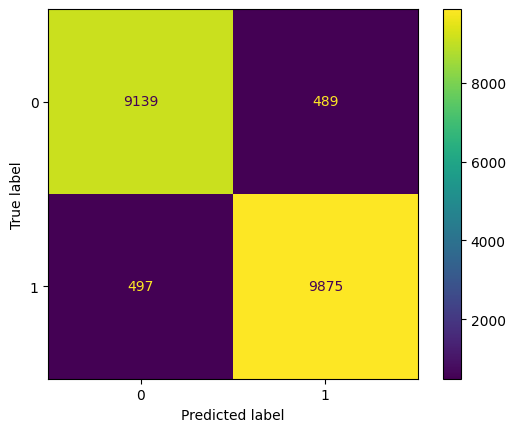

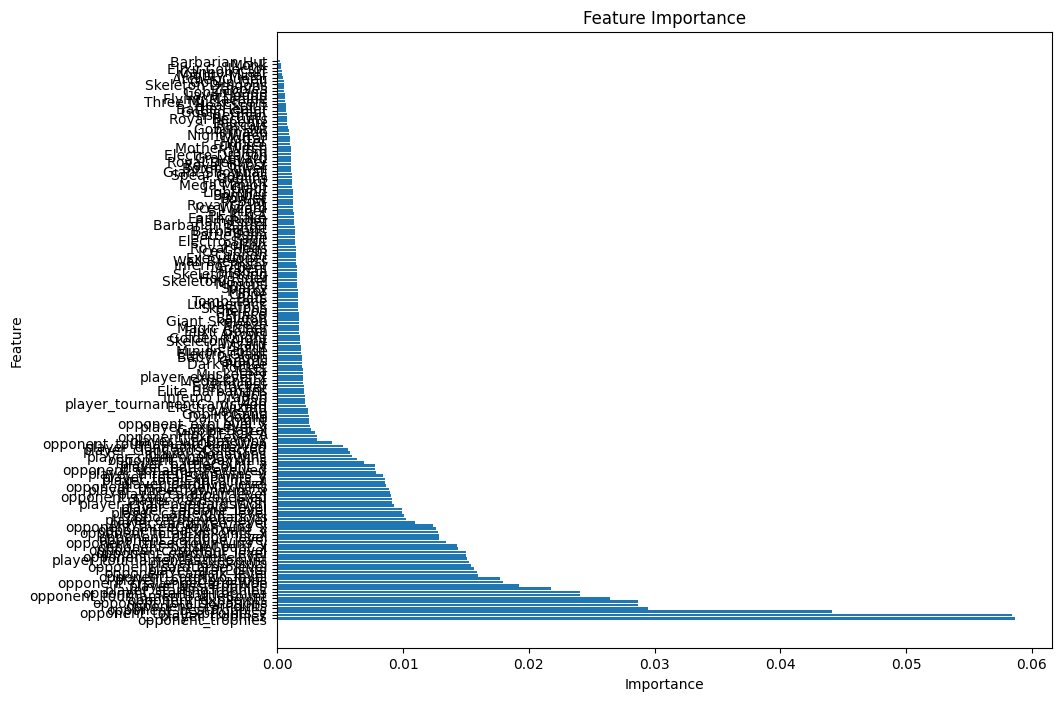

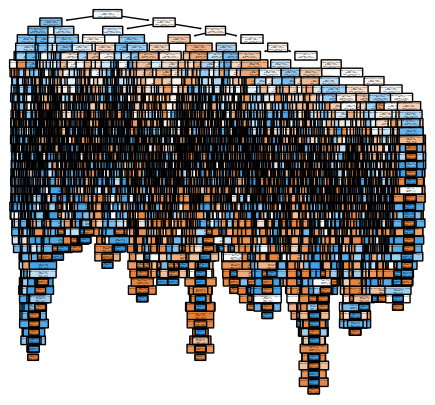

In [ ]:
# dropping
# 0	player_kingTowerHitPoints	0.249841
# 1	opponent_kingTowerHitPoints	0.191657

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
# Since you commented out the plot_confusion_matrix, I assume you're aware it's deprecated.
# You should use ConfusionMatrixDisplay.from_estimator instead, which I'll include here for completeness.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# Feature Importances
feature_importances = clf.feature_importances_

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Visualize the Decision Tree (this might be very large if the tree is deep)
plt.figure(figsize=(5, 5))
plot_tree(clf, feature_names=X.columns, class_names=['Lose', 'Win'], filled=True, rounded=True)
plt.show()


Accuracy: 0.60


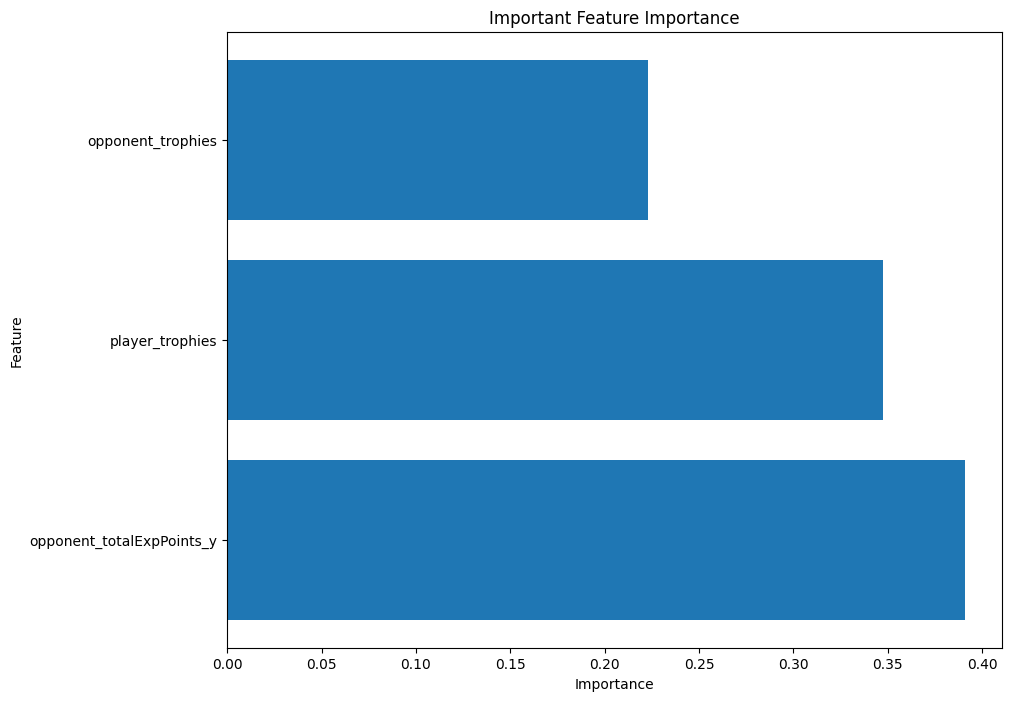

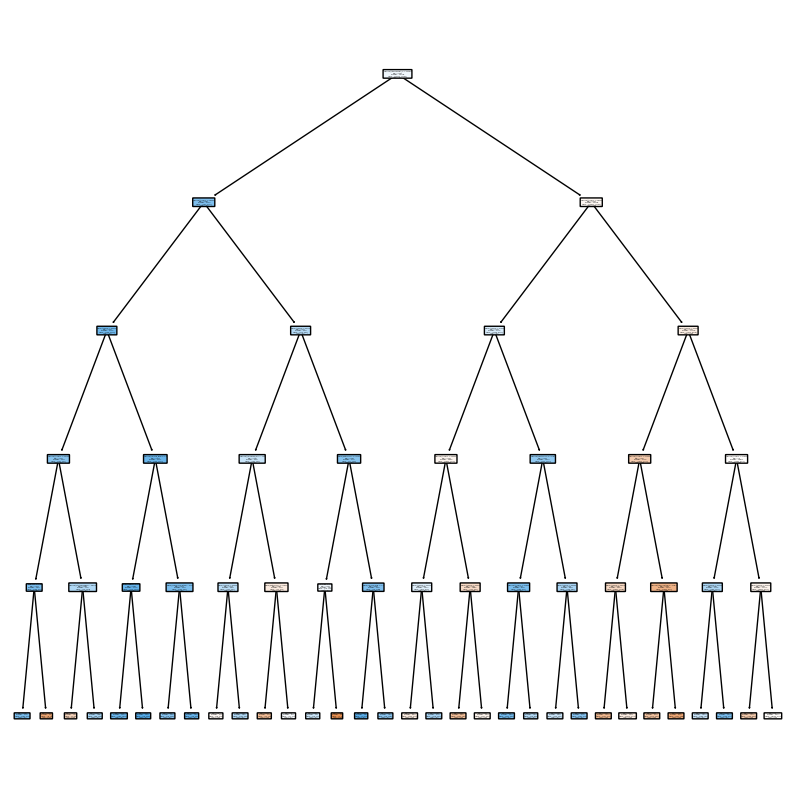

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the classifier with a maximum depth of 5
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature Importances
feature_importances = clf.feature_importances_

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Filter features with importance greater than or equal to 0.1
important_features_df = features_df[features_df['Importance'] >= 0.1]

# Sort the important features based on importance
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the important features
plt.figure(figsize=(10, 8))
plt.barh(important_features_df['Feature'], important_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Important Feature Importance')
plt.show()

# Visualize the Decision Tree (this might be very large if the tree is deep)
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Lose', 'Win'], filled=True, rounded=True)
plt.show()


# SGD Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 0.63


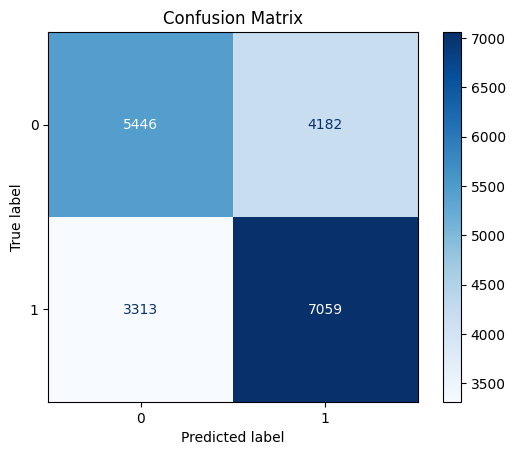

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SGD classifier
sgd = SGDClassifier(loss='log', random_state=42)  # 'log' loss for logistic regression

# Calibrate the classifier for probability estimates
calibrated_sgd = CalibratedClassifierCV(sgd, method='isotonic', cv='prefit')

# Fit the SGD classifier first
sgd.fit(X_train_scaled, y_train)

# Then fit the calibrated classifier
calibrated_sgd.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = calibrated_sgd.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Visualize the Decision Boundary (2D plot for two features)
if X_train_scaled.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5, 100),
                         np.linspace(X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5, 100))
    Z = calibrated_sgd.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdBu, marker='o', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


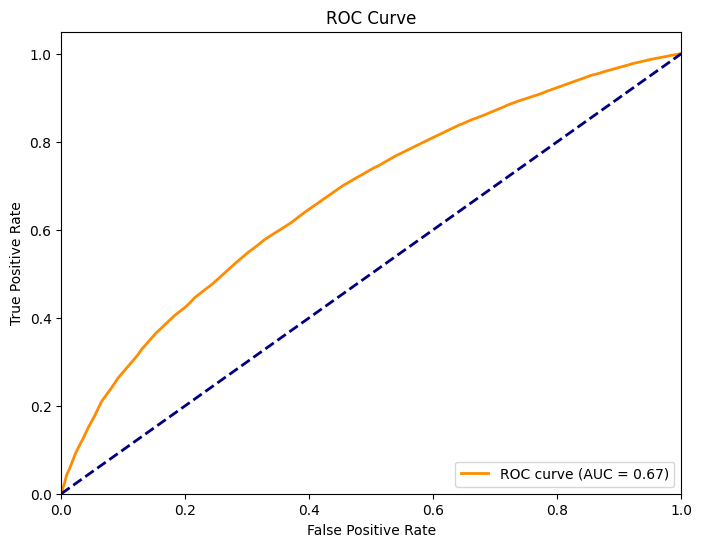

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Calculate ROC curve and AUC
y_prob = calibrated_sgd.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


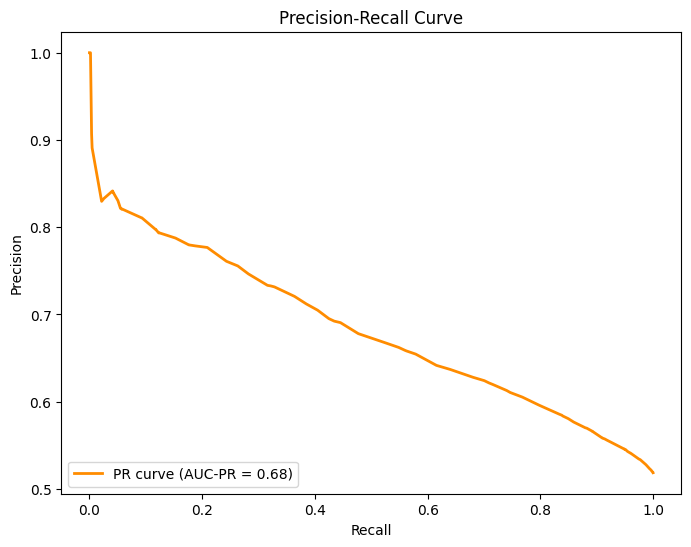

In [ ]:
# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_pr = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# SVM

# Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler


# Standardize the features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Accuracy: 0.98


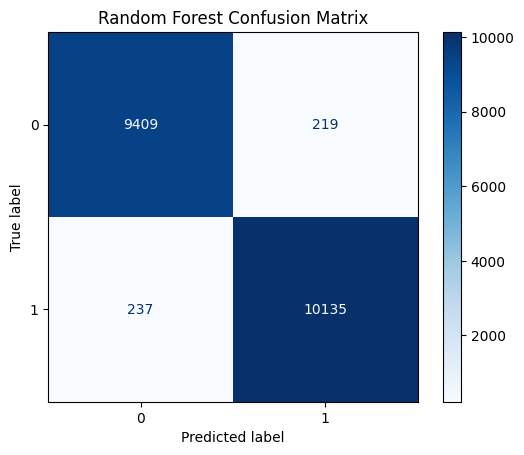

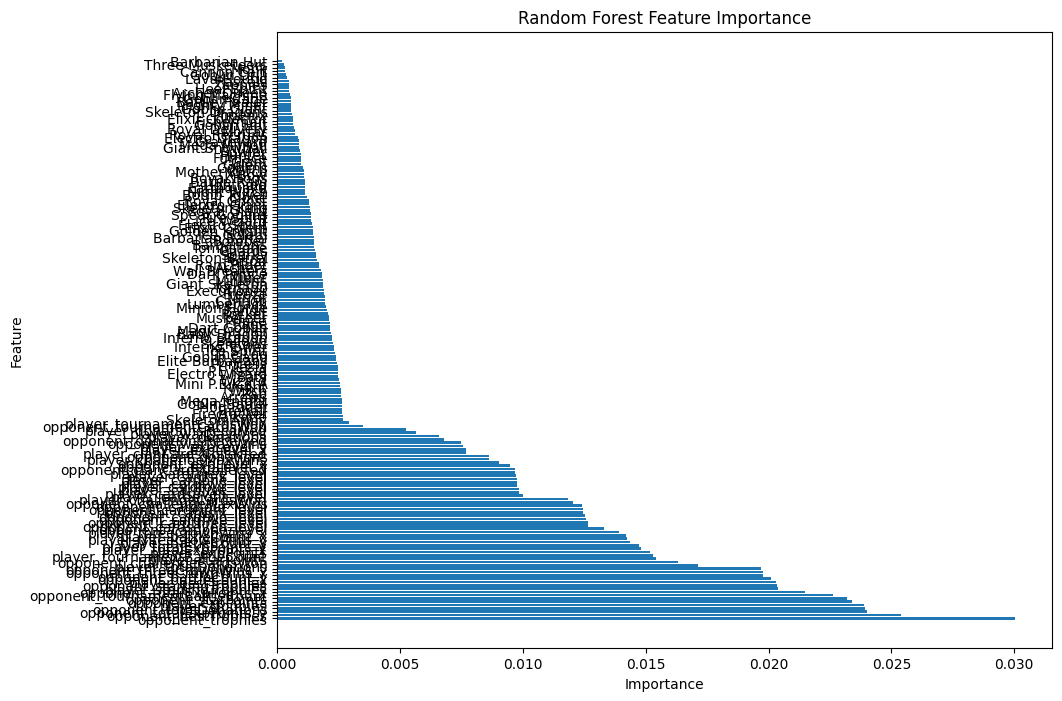

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
cm_display_rf.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Visualize feature importances
feature_importances_rf = rf_classifier.feature_importances_
features_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(features_df_rf['Feature'], features_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


# MLP

In [ ]:
X_train.shape

(261445, 169)

Epoch 1/50, Loss: 0.6347, Accuracy: 0.6345
Epoch 2/50, Loss: 0.6110, Accuracy: 0.6638
Epoch 3/50, Loss: 0.5964, Accuracy: 0.6789
Epoch 4/50, Loss: 0.5861, Accuracy: 0.6880
Epoch 5/50, Loss: 0.5785, Accuracy: 0.6949
Epoch 6/50, Loss: 0.5728, Accuracy: 0.6984
Epoch 7/50, Loss: 0.5679, Accuracy: 0.7031
Epoch 8/50, Loss: 0.5639, Accuracy: 0.7068
Epoch 9/50, Loss: 0.5606, Accuracy: 0.7100
Epoch 10/50, Loss: 0.5578, Accuracy: 0.7114
Epoch 11/50, Loss: 0.5550, Accuracy: 0.7140
Epoch 12/50, Loss: 0.5529, Accuracy: 0.7149
Epoch 13/50, Loss: 0.5505, Accuracy: 0.7185
Epoch 14/50, Loss: 0.5488, Accuracy: 0.7191
Epoch 15/50, Loss: 0.5468, Accuracy: 0.7217
Epoch 16/50, Loss: 0.5450, Accuracy: 0.7221
Epoch 17/50, Loss: 0.5435, Accuracy: 0.7237
Epoch 18/50, Loss: 0.5420, Accuracy: 0.7242
Epoch 19/50, Loss: 0.5412, Accuracy: 0.7241
Epoch 20/50, Loss: 0.5397, Accuracy: 0.7267
Epoch 21/50, Loss: 0.5389, Accuracy: 0.7279
Epoch 22/50, Loss: 0.5379, Accuracy: 0.7281
Epoch 23/50, Loss: 0.5366, Accuracy: 0.72

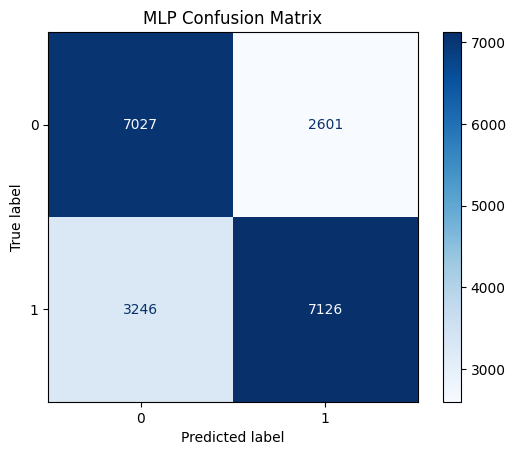

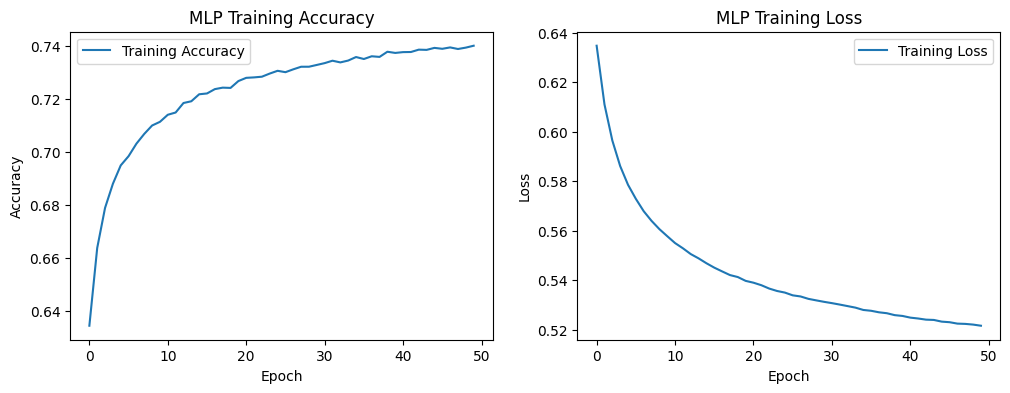

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define the MLP model in PyTorch
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Create DataLoader for PyTorch tensors
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)

# Initialize the MLP model
input_dim = X_train_scaled.shape[1]
model_mlp = MLP(input_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)

# Training loop
epochs = 50
history_mlp = {'accuracy': [], 'loss': []}
for epoch in range(epochs):
    total_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_mlp(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)

    train_accuracy = correct / total
    train_loss = total_loss / len(train_loader)
    history_mlp['accuracy'].append(train_accuracy)
    history_mlp['loss'].append(train_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}')

# Evaluate the MLP model
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_pred_mlp = (model_mlp(X_test_tensor) > 0.5).numpy().astype(int)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp:.2f}')

# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_display_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
cm_display_mlp.plot(cmap='Blues', values_format='d')
plt.title('MLP Confusion Matrix')
plt.show()

# Visualize MLP training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training Loss')
plt.legend()
plt.show()


Epoch 1/200, Loss: 0.6345, Accuracy: 0.6355
Epoch 2/200, Loss: 0.6115, Accuracy: 0.6635
Epoch 3/200, Loss: 0.5966, Accuracy: 0.6779
Epoch 4/200, Loss: 0.5865, Accuracy: 0.6868
Epoch 5/200, Loss: 0.5788, Accuracy: 0.6933
Epoch 6/200, Loss: 0.5729, Accuracy: 0.6985
Epoch 7/200, Loss: 0.5680, Accuracy: 0.7033
Epoch 8/200, Loss: 0.5639, Accuracy: 0.7063
Epoch 9/200, Loss: 0.5601, Accuracy: 0.7094
Epoch 10/200, Loss: 0.5577, Accuracy: 0.7116
Epoch 11/200, Loss: 0.5549, Accuracy: 0.7140
Epoch 12/200, Loss: 0.5525, Accuracy: 0.7167
Epoch 13/200, Loss: 0.5503, Accuracy: 0.7187
Epoch 14/200, Loss: 0.5487, Accuracy: 0.7197
Epoch 15/200, Loss: 0.5467, Accuracy: 0.7217
Epoch 16/200, Loss: 0.5453, Accuracy: 0.7227
Epoch 17/200, Loss: 0.5436, Accuracy: 0.7240
Epoch 18/200, Loss: 0.5422, Accuracy: 0.7249
Epoch 19/200, Loss: 0.5411, Accuracy: 0.7262
Epoch 20/200, Loss: 0.5394, Accuracy: 0.7277
Epoch 21/200, Loss: 0.5386, Accuracy: 0.7270
Epoch 22/200, Loss: 0.5375, Accuracy: 0.7286
Epoch 23/200, Loss:

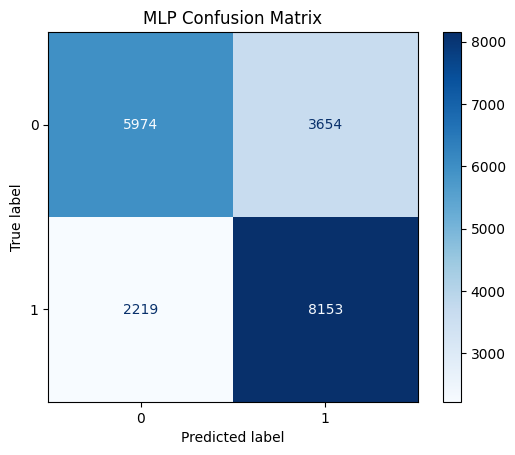

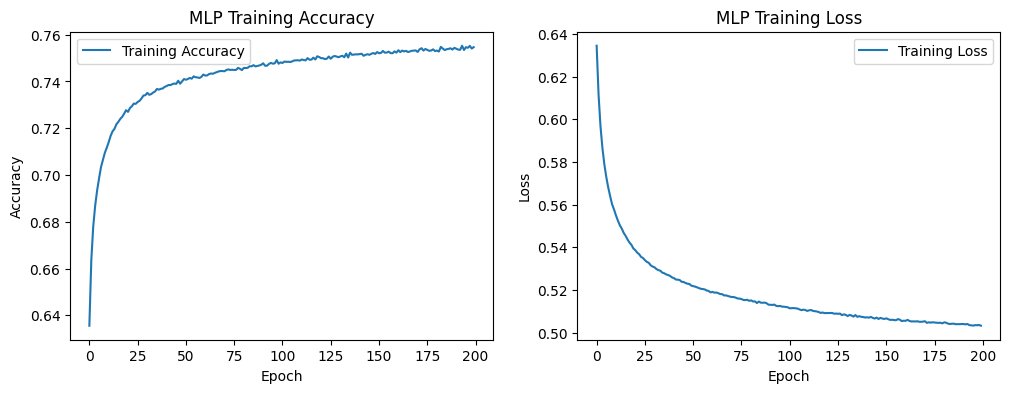

In [ ]:
# version 2 of MLP
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define the MLP model in PyTorch
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Create DataLoader for PyTorch tensors
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)

# Initialize the MLP model
input_dim = X_train_scaled.shape[1]
model_mlp = MLP(input_dim)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)
final_epoch_data = []

# Training loop
epochs = 200
history_mlp = {'accuracy': [], 'loss': []}
for epoch in range(epochs):
    total_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_mlp(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels.view(-1, 1)).sum().item()
        total += labels.size(0)
        # Save data in the final epoch
    if epoch == epochs - 1:
        for inputs, labels in train_loader:
            outputs = model_mlp(inputs)
            predicted = (outputs > 0.5).float()


            # Convert tensors to numpy arrays for easy handling
            inputs_np = inputs.numpy()
            labels_np = labels.numpy()
            predicted_np = predicted.detach().numpy()

            # Save row, actual Y, predicted Y
            for i in range(inputs_np.shape[0]):
                final_epoch_data.append({'row': inputs_np[i], 'actualY': labels_np[i], 'predictedY': predicted_np[i][0]})


    train_accuracy = correct / total
    train_loss = total_loss / len(train_loader)
    history_mlp['accuracy'].append(train_accuracy)
    history_mlp['loss'].append(train_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}')

# Evaluate the MLP model
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_pred_mlp = (model_mlp(X_test_tensor) > 0.5).numpy().astype(int)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp:.2f}')

# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_display_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
cm_display_mlp.plot(cmap='Blues', values_format='d')
plt.title('MLP Confusion Matrix')
plt.show()

# Visualize MLP training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mlp['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training Loss')
plt.legend()
plt.show()



# Convert X_test to DataFrame if it's not already one
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test.copy()

# Add actual and predicted labels as new columns
X_test_df['ActualY'] = y_test
X_test_df['PredictedY'] = y_pred_mlp.ravel()

# Save to CSV
X_test_df.to_csv('test_data_with_predictions.csv', index=False)

In [ ]:

# Convert X_test to DataFrame if it's not already one
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test.copy()

# Add actual and predicted labels as new columns
X_test_df['ActualY'] = y_test
X_test_df['PredictedY'] = y_pred_mlp.ravel()

# Save to CSV
X_test_df.to_csv('test_data_with_predictions.csv', index=False)

In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 840.7 kB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.69313 |  0:00:36s
epoch 1  | loss: 0.68137 |  0:01:12s
epoch 2  | loss: 0.67907 |  0:01:48s
epoch 3  | loss: 0.67843 |  0:02:23s
epoch 4  | loss: 0.67676 |  0:02:58s
epoch 5  | loss: 0.67207 |  0:03:32s
epoch 6  | loss: 0.64846 |  0:04:07s
epoch 7  | loss: 0.63657 |  0:04:42s
epoch 8  | loss: 0.63269 |  0:05:17s
epoch 9  | loss: 0.62952 |  0:05:51s
epoch 10 | loss: 0.62695 |  0:06:26s
epoch 11 | loss: 0.62455 |  0:07:00s
epoch 12 | loss: 0.62154 |  0:07:35s
epoch 13 | loss: 0.61899 |  0:08:10s
epoch 14 | loss: 0.61616 |  0:08:50s
epoch 15 | loss: 0.61355 |  0:09:41s
epoch 16 | loss: 0.61088 |  0:10:16s
epoch 17 | loss: 0.60823 |  0:10:51s
epoch 18 | loss: 0.60709 |  0:11:26s
epoch 19 | loss: 0.60412 |  0:12:00s
epoch 20 | loss: 0.60088 |  0:12:38s
epoch 21 | loss: 0.59861 |  0:13:12s
epoch 22 | loss: 0.59622 |  0:13:46s
epoch 23 | loss: 0.59498 |  0:14:21s
epoch 24 | loss: 0.59278 |  0:14:55s
epoch 25 | loss: 0.58977 |  0:15:29s
epoch 26 | loss: 0.58769 |  0:16:03s
e

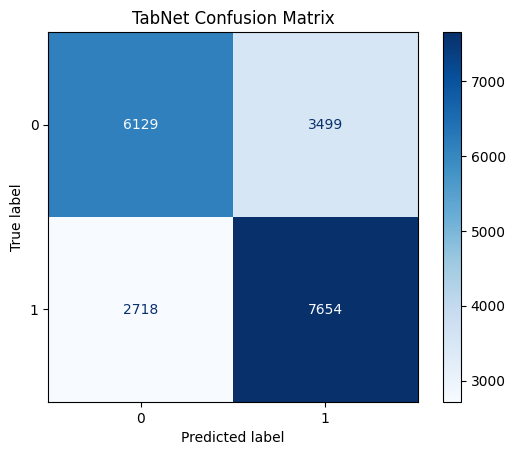

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from pytorch_tabnet.tab_model import TabNetClassifier
import torch



# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.values.astype(np.float32)
y_train_np = y_train.values.astype(np.int64)
X_test_np = X_test.values.astype(np.float32)
y_test_np = y_test.values.astype(np.int64)

# Initialize the TabNetClassifier
clf = TabNetClassifier()

# Fit the model on the training data
clf.fit(X_train_np, y_train_np, max_epochs=120)  # You can adjust the number of epochs

# Make predictions on the testing data
y_pred = clf.predict(X_test_np)

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred)
print(f'TabNet Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues', values_format='d')
plt.title('TabNet Confusion Matrix')
plt.show()


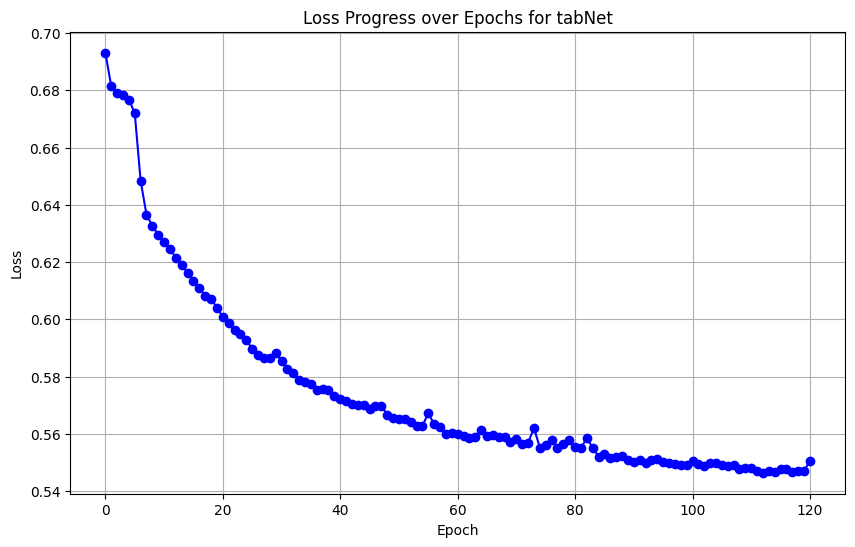

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(120+1))  # Assuming there are 120 epochs
loss_values = [
    0.69313, 0.68137, 0.67907, 0.67843, 0.67676, 0.67207, 0.64846, 0.63657, 0.63269, 0.62952,
    0.62695, 0.62455, 0.62154, 0.61899, 0.61616, 0.61355, 0.61088, 0.60823, 0.60709, 0.60412,
    0.60088, 0.59861, 0.59622, 0.59498, 0.59278, 0.58977, 0.58769, 0.58642, 0.58642, 0.58809,
    0.58553, 0.58269, 0.58124, 0.57865, 0.578, 0.57752, 0.57549, 0.57567, 0.57546, 0.57337,
    0.57213, 0.57164, 0.5706, 0.5702, 0.57024, 0.56858, 0.56968, 0.56971, 0.56676, 0.5654,
    0.56533, 0.5652, 0.5641, 0.56268, 0.56285, 0.56716, 0.56343, 0.56224, 0.56008, 0.56013,
    0.56, 0.55919, 0.55869, 0.55882, 0.56146, 0.55941, 0.55954, 0.55906, 0.55874, 0.55706,
    0.55825, 0.55661, 0.55693, 0.56201, 0.55521, 0.55612, 0.55794, 0.55503, 0.55631, 0.55773,
    0.55538, 0.55511, 0.55846, 0.55522, 0.55207, 0.55287, 0.55162, 0.5519, 0.55231, 0.55071,
    0.55023, 0.551, 0.54974, 0.55097, 0.55116, 0.55026, 0.54974, 0.54956, 0.54922, 0.54929,
    0.55063, 0.54935, 0.54869, 0.54988, 0.54968, 0.5493, 0.54867, 0.54917, 0.54787, 0.5482,
    0.54811, 0.54703, 0.54643, 0.54691, 0.54678, 0.5476, 0.54766, 0.5468, 0.54708, 0.54705,
    0.55063  # Repetition of the last value for 100 epochs
]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Progress over Epochs for tabNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
